<h1 style="background-color:#C2B4B9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Bird Species Classification Using Convolutional Neural Networks </centre></strong></h1>

<h2 style="background-color:#C2B4B9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Methodology: Transforming Images and Splitting the Data </centre></strong></h2>

#### 02.Data Preprocessing

Effective data transformation and splitting strategies are critical for building robust deep learning models. This section will cover image resizing, normalization, augmentation, and splitting the dataset into training, validation, and test sets.<br>
**Objective:** Preprocess the dataset including resizing, normalization, and data augmentation.<br>
<br>
---


#### Import Libraries

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Data Augmentation:

In [5]:
data_dir = '../dataset/raw/CUB_200_2011/images/'

datagen = ImageDataGenerator(
        rescale=1. / 255, #Normalizes the pixel values of the images.
    rotation_range=40, #Randomly rotates images. Images can be rotated by up to 40 degrees.
    width_shift_range=0.2, #Randomly shifts images horizontally.Images can be shifted up to 20% of the width
    height_shift_range=0.2, #Randomly shifts images vertically.Images can be shifted up to 20% of the height. 
    shear_range=0.2, #Applies shearing transformations. hear transformations alter the image in a way that shifts one part of the image in a direction parallel to the opposing axis, which can help in making the model robust to such transformations.
    zoom_range=0.2, #Randomly zooms in on images.Images can be zoomed in by up to 20%. 
    horizontal_flip=True,#Randomly flips images horizontally.This can double the dataset by flipping images.
    fill_mode='nearest', #Fills in new pixels after transformations.When transformations (like rotation or shifting) create empty areas in the image, they are filled in using the nearest pixel values.
    validation_split=0.2 #Splits the data into training and validation sets. 20% of the data is reserved for validation, which helps in evaluating the model's performance on unseen data.
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1176 images belonging to 25 classes.
Found 290 images belonging to 25 classes.


#### Visualize Augmented Images

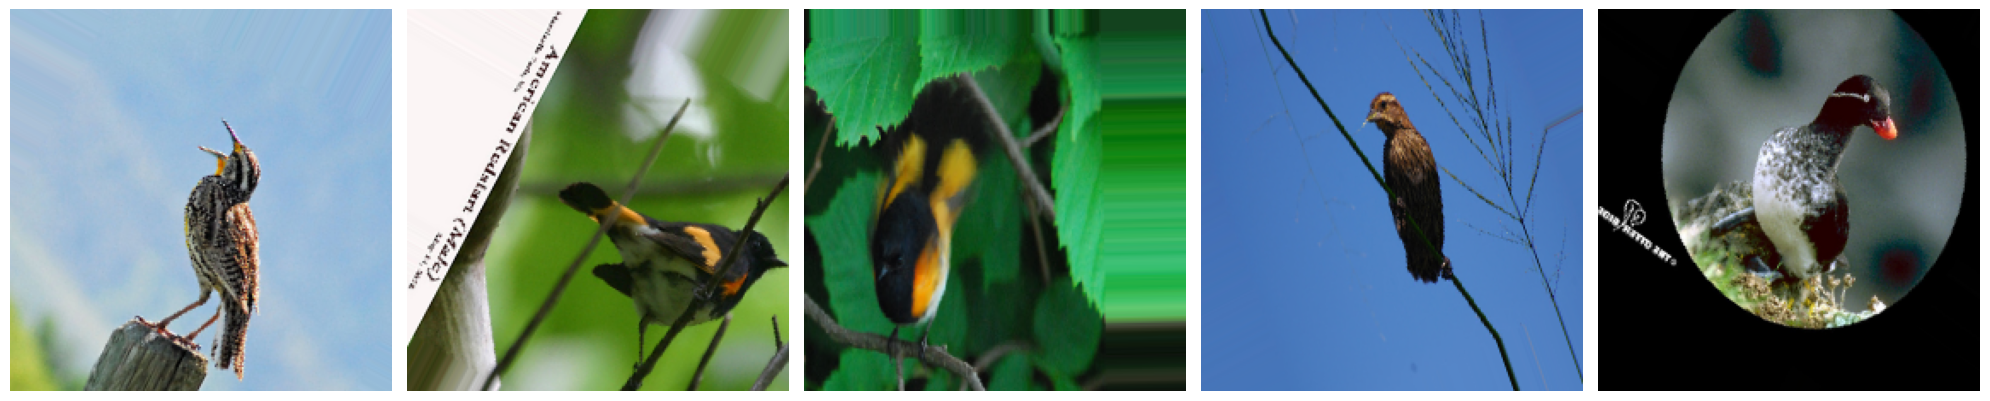

In [6]:
sample_training_images, _ = next(train_generator)
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plot_images(sample_training_images[:5])